Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=fc9690adf0838383db195c8e7b8363471f838e7de51b264e21e9e18b8baa73ef
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null    

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


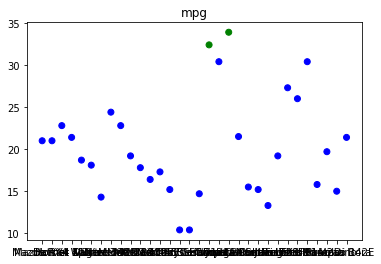

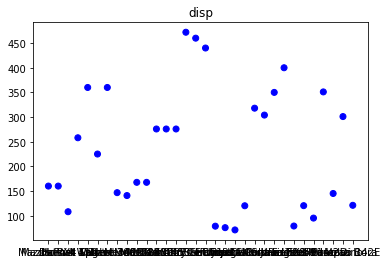

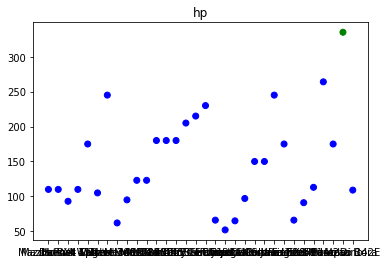

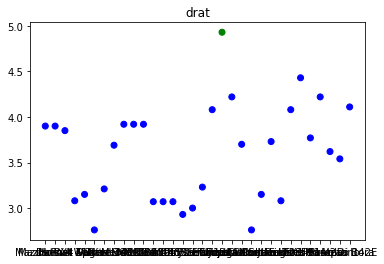

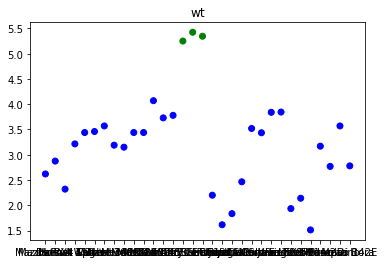

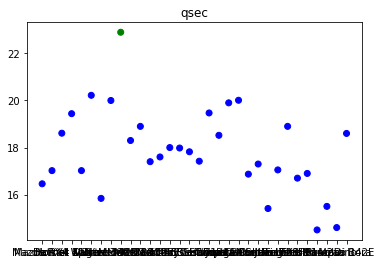

In [ ]:
!pip install pydataset
# Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import pandas as pd, numpy as np 
import scipy.stats as sps 

# Load Dataset 
cars_data = data('mtcars')
cars_data.info()
cars_data.describe() 
non_cat_vars = cars_data[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']]

# Loop through each non-categorical variable
for col in non_cat_vars:
    mean = non_cat_vars[col].mean()
    std_dev = non_cat_vars[col].std()
    ci = mean + 2 * std_dev

    # Define outliers as values outside the confidence interval
    non_cat_vars.loc[(non_cat_vars[col] < mean - 2 * std_dev), 'Outliers'] = 'Red'
    non_cat_vars.loc[(non_cat_vars[col] > mean +  2 * std_dev), 'Outliers'] = 'Green'
    non_cat_vars.loc[(non_cat_vars[col] > mean - 2 * std_dev) & (non_cat_vars[col] < mean + 2 * std_dev), 'Outliers'] = 'Blue'
    # Create a scatter plot of the variable with the outliers color-coded
    plt.scatter(non_cat_vars.index, non_cat_vars[col], c=non_cat_vars['Outliers'])
    plt.title(col)
    plt.show()
